# Problema 1 - Estimando o consumo de veículos

* Minicurso _Machine Learning -- Hands on com Python_
* Samsung Ocean Manaus
* Facilitadora: Elloá B. Guedes 
* Repositório: http://bit.ly/mlpython
* Nome:
* Email: 

### Bibliotecas

Por hábito, a primeira célula do notebook costuma ser reservada para importação de bibliotecas.
A cada biblioteca nova acrescida, é necessário executar a célula para atualização e correta execução.

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Abertura do Dataset

Abra o dataset e visualize o seu cabeçalho, isto é, os primeiros exemplos nele contidos.
Isto é útil para checar se a importação foi realizada de maneira adequada e se a disposição dos dados está de acordo para os próximos passos do trabalho.

In [16]:
df = pd.read_csv("autompg.csv",sep = ";")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Conhecendo o dataset

Para praticar conceitos relativos à exploração do conjunto de dados, utilize as células a seguir para prover respostas para as seguintes perguntas:

1. Quantos exemplos há no dataset?
2. Quais os atributos existentes no dataset?
3. Quais os nomes dos carros existentes no dataset?
4. Quais as características do 'chevrolet camaro'?
5. Qual a média de consumo, em galões por litro, dos carros existentes no dataset?

In [17]:
len(df)

406

In [18]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'modelyear', 'origin', 'name'],
      dtype='object')

In [19]:
df['name']

0              chevrolet chevelle malibu
1                      buick skylark 320
2                     plymouth satellite
3                          amc rebel sst
4                            ford torino
5                       ford galaxie 500
6                       chevrolet impala
7                      plymouth fury iii
8                       pontiac catalina
9                     amc ambassador dpl
10                  citroen ds-21 pallas
11      chevrolet chevelle concours (sw)
12                      ford torino (sw)
13               plymouth satellite (sw)
14                    amc rebel sst (sw)
15                   dodge challenger se
16                    plymouth 'cuda 340
17                 ford mustang boss 302
18                 chevrolet monte carlo
19               buick estate wagon (sw)
20                 toyota corona mark ii
21                       plymouth duster
22                            amc hornet
23                         ford maverick
24              

In [20]:
df.loc[df['name'] == "chevrolet camaro"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,name
400,27.0,4.0,151.0,90.0,2950.0,17.3,82.0,1.0,chevrolet camaro


In [21]:
np.mean(df['mpg'])

23.514572864321615

### Preparação dos dados

1. Existem exemplos com dados faltantes. Para fins de simplificação, elimine-os do dataset.
2. Exclua a coluna com os nomes dos carros
3. Converta mpg para km/l sabendo que: 1 mpg  = 0.425 km/l. Utilize apenas duas casas decimais nesta conversão.
4. Remova a coluna mpg e insira a coluna kml no dataset.

In [22]:
df.dropna(inplace=True)

In [23]:
df.drop(['name'],axis = 1,inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [24]:
kml = [round(x*0.425,2) for x in df["mpg"]]

In [25]:
df['kml'] = kml
df.drop(['mpg'],axis = 1,inplace=True)
df.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin,kml
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,7.65
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,6.38
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,7.65
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,6.80
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,7.22


### Organização dos dados para treinamento

1. Remova a coluna kml e atribua-a a uma variável Y
2. Atribua os demais valores do dataset a uma variável X
3. Efetue uma partição holdout 70/30 com o sklearn

In [26]:
Y = df['kml']
df.drop(["kml"],axis = 1,inplace=True)
X = df
X.head()

,cylinders,displacement,horsepower,weight,acceleration,modelyear,origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [27]:
# Necessário importar: from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30)

### Treinamento de um modelo de regressão linear

1. Importe o modelo da biblioteca sklearn
2. Instancie o modelo com parâmetros padrão (default)
3. Execute o algoritmo de treinamento com os dados de treino

In [28]:
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Teste do modelo

Vamos observar a saída do modelo para um exemplo individual existente nos dados de treino:
* Atributos preditores: X_test[2:3]
* Atributo alvo: Y_test.iloc[2]
* Qual o resultado previsto para o modelo, dados estes atributos preditores?

In [29]:
teste1 = X_test[2:3]
resultado = regr.predict(teste1)
print(resultado,Y_test.iloc[2])

[12.23482843] 13.17


### Teste do modelo

1. Obtenha o erro médio quadrático para todos os dados de teste
 * Efetue a importação de mean_squared_error do pacote sklearn.metrics
 * Trata-se do somatório do quadrado das diferenças entre valores previstos pelo modelo e observados na prática
 * Quanto mais próximo de zero, melhor este resultado
2. Obtenha o r^2 para os dados de teste
 * Efetue a importação de r2_score do pacote sklearn.metrics
 * Trata-se de um valor no intervalo [0,1]
 * Quanto mais próximo de 1, melhor é o modelo

In [30]:
Y_predito = regr.predict(X_test)
mse = mean_squared_error(Y_predito,Y_test)
mse

2.3467645499015197

In [31]:
r2 = r2_score(Y_predito,Y_test)
r2

0.7178368636351276

### Obtendo e visualizando os resíduos

Uma maneira muito comum de visualizarmos o quão bom certo modelo é para aprender determinados padrões dá-se por meio da visualização dos resíduos, isto é, da diferença entre os valores previstos e observados. Adapte o código a seguir para calcular os resíduos produzidos pelo seu modelo.

In [34]:
residuos = []
for (x,y) in zip(Y_test,Y_predito):
    residuos.append((x-y)**2)
residuos

[0.15983751942609256,
 0.5477253341534122,
 0.8745458627157038,
 3.4016512086693247,
 1.79385769143608,
 1.655655300327717,
 0.11282331390144802,
 0.49997285239461897,
 1.5863636946995898,
 1.8508140907081765,
 5.247065117838299,
 10.268433785640894,
 0.49209594566266307,
 0.2424416916038056,
 0.0060830472814778075,
 0.886774072939592,
 4.869870219222626,
 2.918081276094515,
 0.8986861205012131,
 2.156089349140755,
 0.00014746155893131718,
 0.20399562242664449,
 2.934517266711463,
 0.6215776557515488,
 2.552322237334607,
 4.729032943931411,
 0.9946020896605926,
 1.2978426399095098,
 0.27971264033155585,
 2.864819126040625,
 0.0014021511448079637,
 16.30738859286149,
 1.6171563107845675,
 3.0572122585479316e-05,
 4.187500903818978,
 6.406369440607882,
 1.508846358444241,
 0.5099213793466693,
 18.4710774563034,
 0.41460806533927247,
 2.4990292345223555,
 0.1720717910835699,
 2.0438299066119394,
 0.4309622592168786,
 0.6874826503351446,
 2.0426547658290266,
 7.312434095470637,
 0.01517754

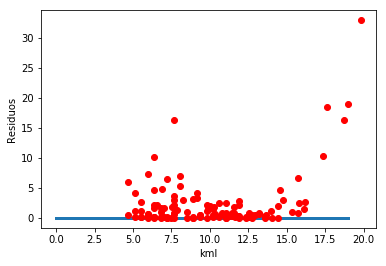

In [35]:
x = [0,int(max(Y_test))]
y = [0,0]
plt.plot(x,y,linewidth=3)
plt.plot(Y_test,residuos,'ro')
plt.ylabel('Residuos')
plt.xlabel('kml')
plt.show()

### Testando K-Vizinhos Mais Próximos

1. Efetue o treinamento do K-Vizinhos mais Próximos, considerando k =5
2. Obtenha o MSE para o conjunto de testes
3. Comparando com os resultados obtidos anteriormente, qual modelo melhor endereça esse problema?

In [40]:
# Necessário importar: from sklearn.neighbors import KNeighborsRegressor
kviz = KNeighborsRegressor(n_neighbors=5)
kviz.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [41]:
Y_preditoKViz = kviz.predict(X_test)
msekviz = mean_squared_error(Y_preditoKViz,Y_test)
msekviz

4.13158088512241